In [1]:
%load_ext autoreload
%autoreload 2

from stanley_appex.estimation import *
from stanley_appex.plotting import *
from stanley_appex.utils import *
from stanley_appex.generate_data import *
import numpy as np
import matplotlib.pyplot as plt

15000
(10, 15000, 2)
Final number of trajectories: 10


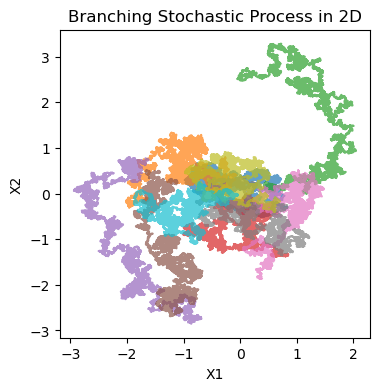

In [22]:
A = np.array([[0, -1], 
              [1, 0]])
d = A.shape[0]
# A = np.array([1.0])

G = np.array([[1, 0.0], 
              [0.0, 1]])

H = G@G.T

growth_rate = 0.0 # 0.75
death_rate = 0.4
# lambda_func = lambda X: 1.3 * np.exp(-0.01*np.linalg.norm(X))  # Decaying branching rate
# lambda_func = lambda X: growth_rate # 1.0 # 1.0 # Constant branching rate

N_init = 10 # 5
X0 = np.random.multivariate_normal(np.zeros(d), np.diag(np.ones(d)), N_init) # np.random.normal(0, 1, (N_init, A.shape[1]))
# X0 = np.random.normal(0, 1, (N_init))
Nt = 15000
process = BranchingStochasticProcess(A, G, dt=0.0001, Nt=Nt, N_traj=N_init)
process.simulate(X0, growth_rate=growth_rate)
# process.simulate_birth_death(X0, growth_rate=growth_rate, death_rate=death_rate)
print("Final number of trajectories:", process.N_traj)
process.plot_trajectories(downsample=1)

# process.save_file(f'data/trajectories.h5', downsample_rate=500)

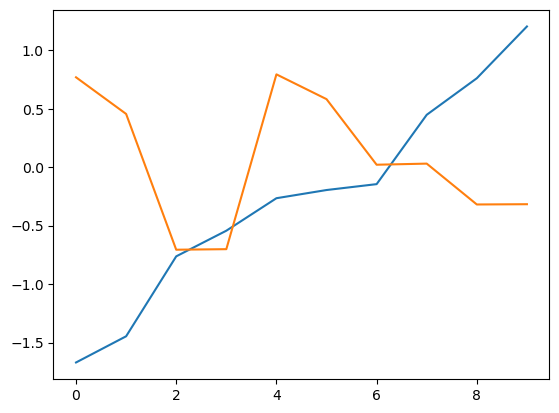

In [23]:
plt.plot(process.time_marginals[0])

In [ ]:
process_old = process

NameError: name 'copy' is not defined

N traj 10 N time steps 1500
iteration 0, running tolerance 2.449489742783178
A_est:
 [[-14.12269652   2.70323953]
 [  4.16638587 -17.74154653]]
H_est:
 [[21.73358016 -0.26141931]
 [-0.26141931 22.25547835]]


(<matplotlib.image.AxesImage at 0x3353079a0>,
 <matplotlib.colorbar.Colorbar at 0x3339ee0e0>)

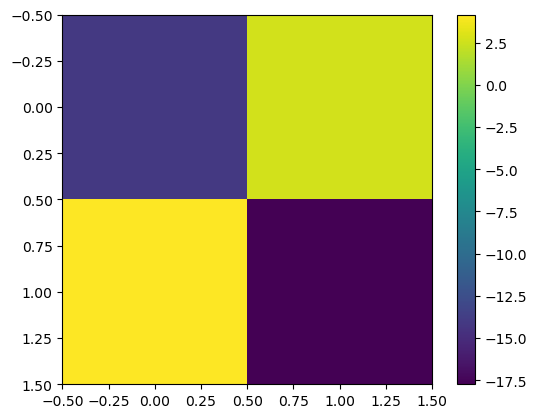

In [33]:
# xs_data: (N, N_traj, d)
# ts_data: (N,)
downsample_rate = 10

ts_data = process.ts[::downsample_rate]
xs_data = np.array(process.marginals(downsample_rate=downsample_rate)) + np.random.normal(0, 0.1, (len(ts_data), process.N_traj, d))

print("N traj", process.N_traj, "N time steps", ts_data.shape[0])

ridge_lambda = 0.0

A_guess = A # np.eye(2) # A
H_guess = G@G.T # np.eye(2) # G@G.T
As, Hs, Pis = appex_rectangle(xs_data, ts_data, A_guess, H_guess, N_sample=process.N_traj*10, ridge_lambda=ridge_lambda, tol=1e-5, maxiters=5, print_out=10, save_coupling=True, reverse=False)

A_est = As[-1]
H_est = Hs[-1]
Pi_est = Pis[-1]
print("A_est:\n", A_est)
print("H_est:\n", H_est)
plt.imshow(A_est), plt.colorbar()

In [62]:
process.run_appex(downsample_rate=10)

N traj 10 N time steps 1500
iteration 0, running tolerance 2.0


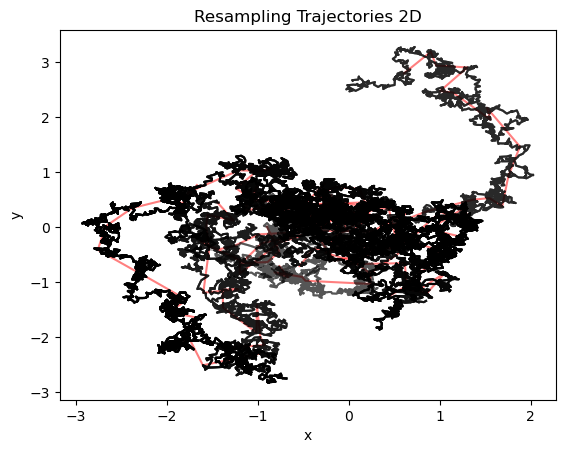

In [70]:
process.plot_sampling(downsample_rate=1000)

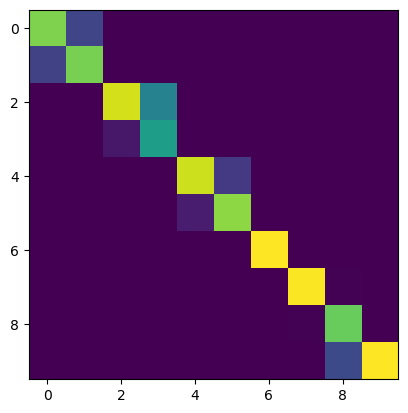

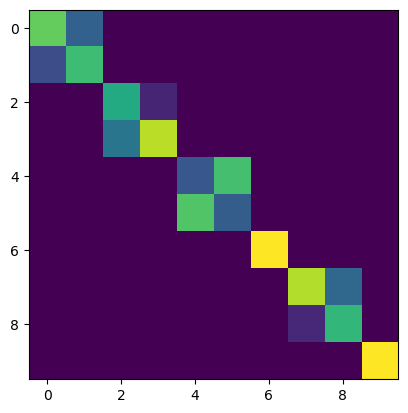

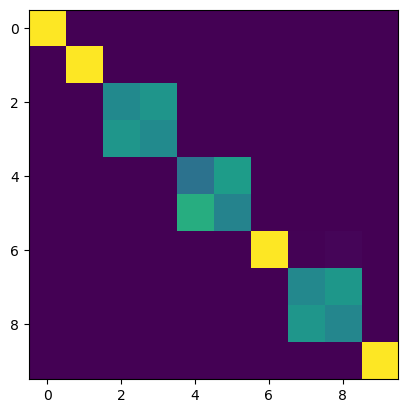

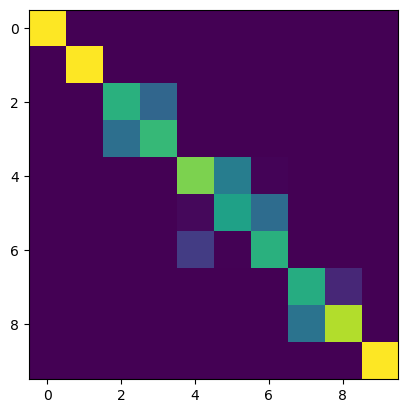

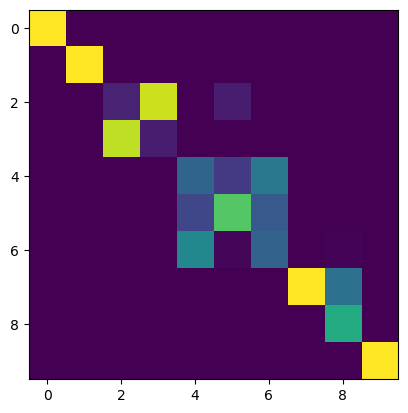

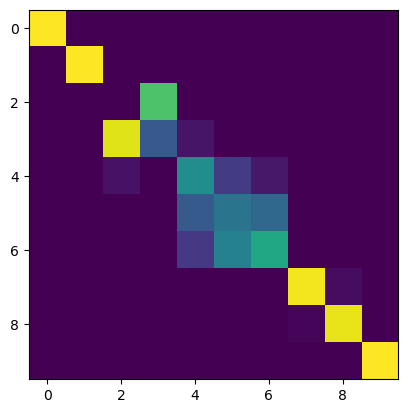

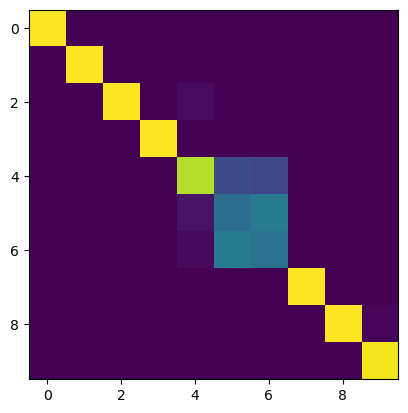

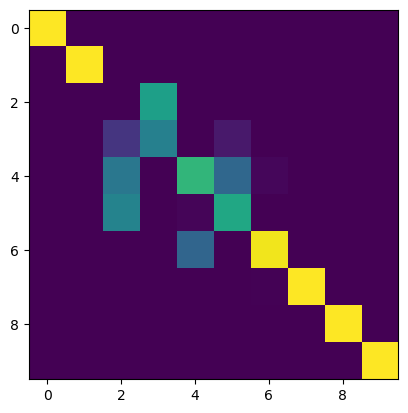

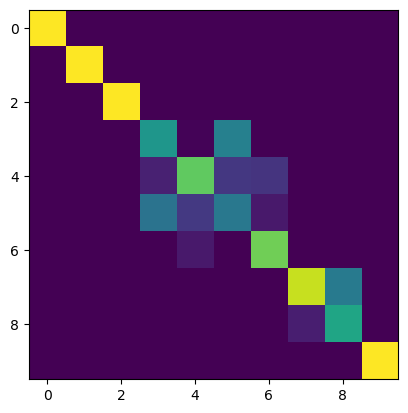

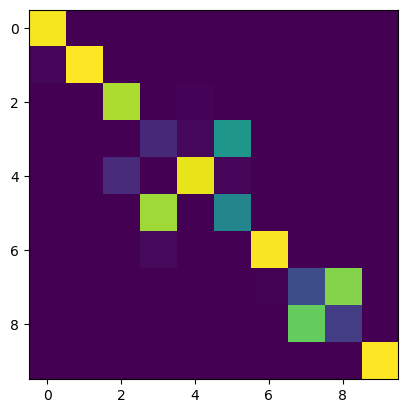

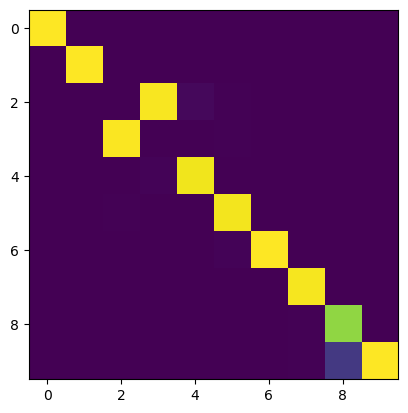

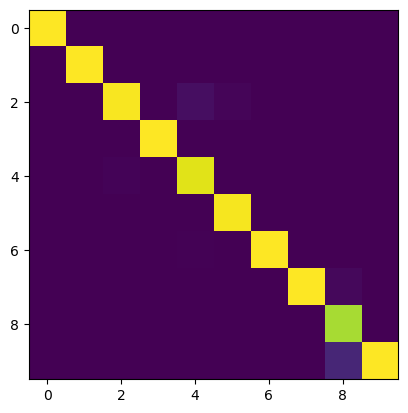

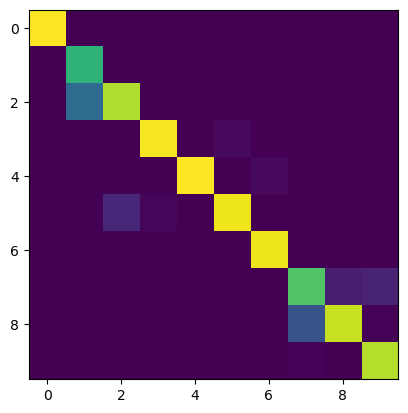

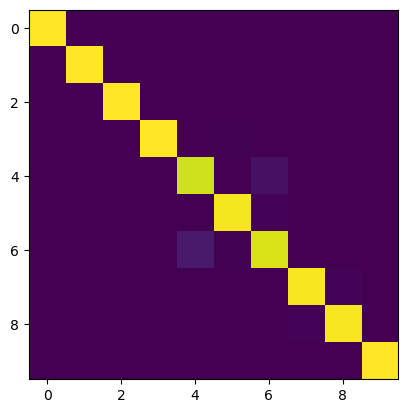

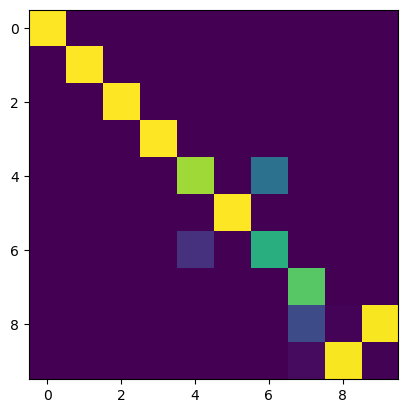

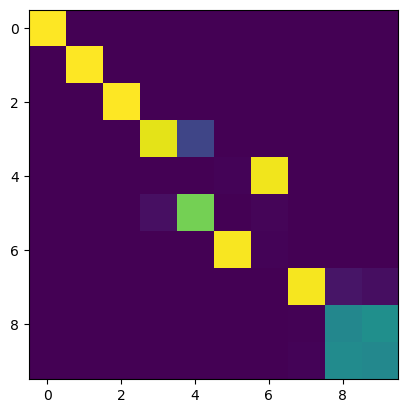

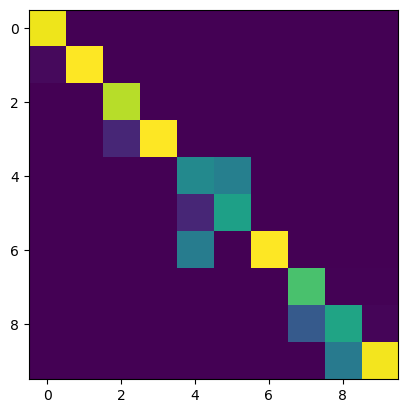

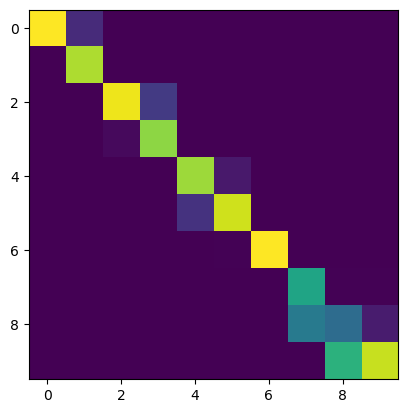

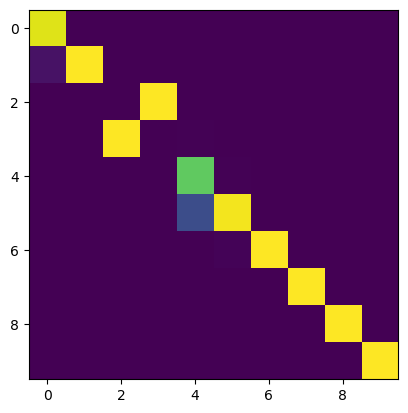

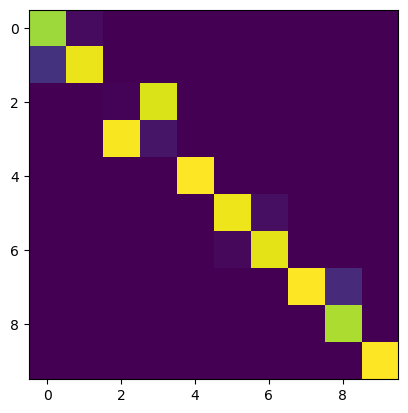

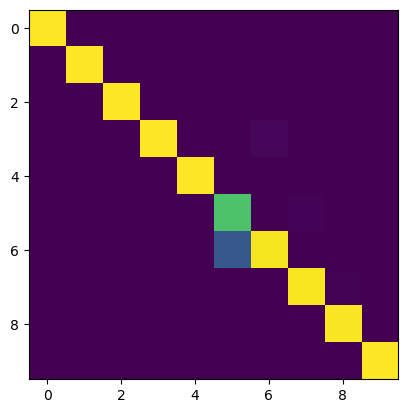

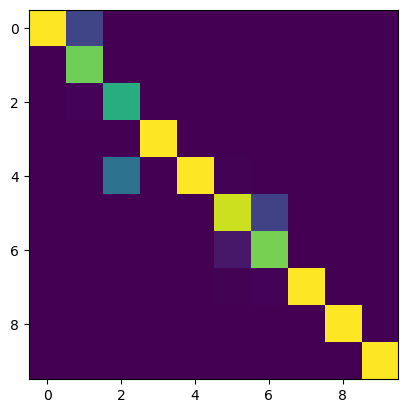

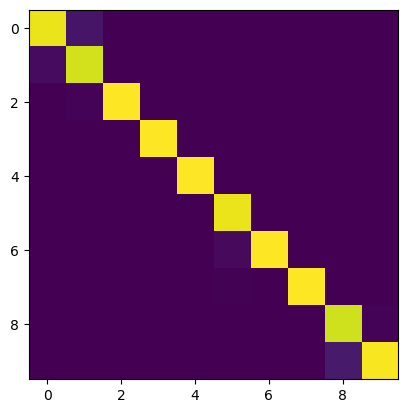

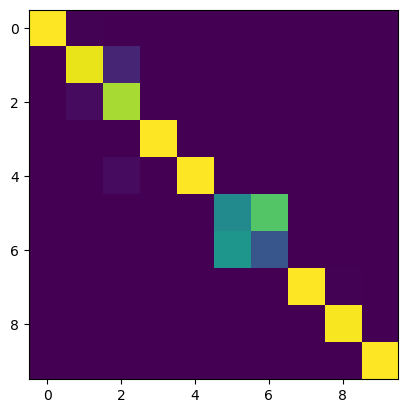

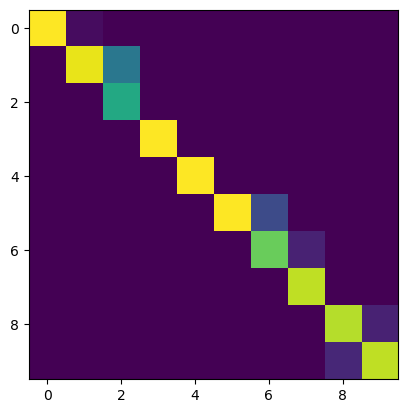

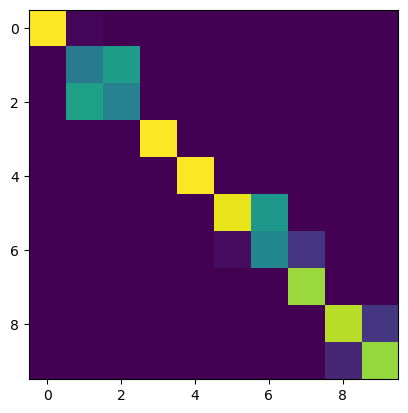

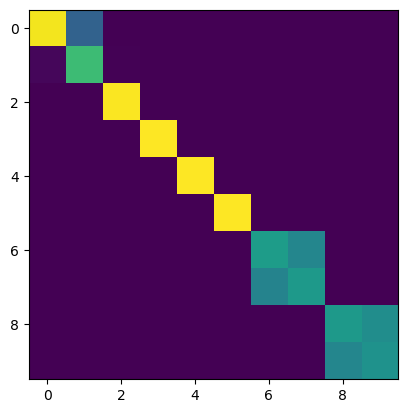

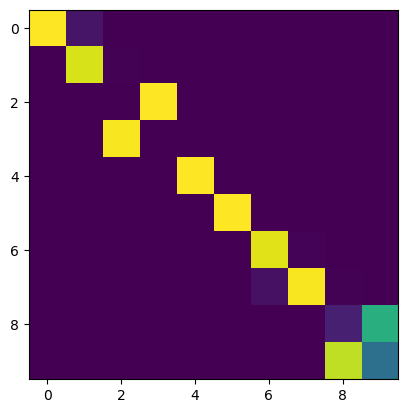

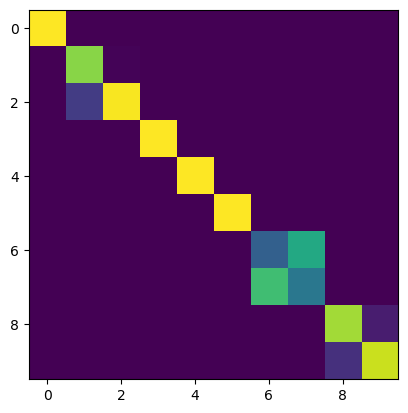

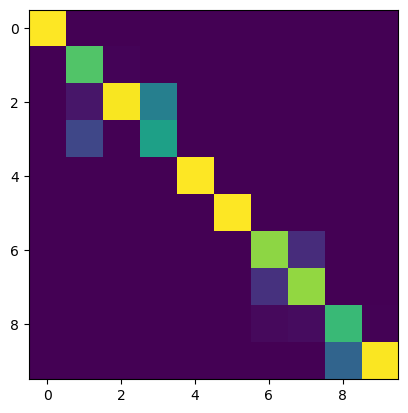

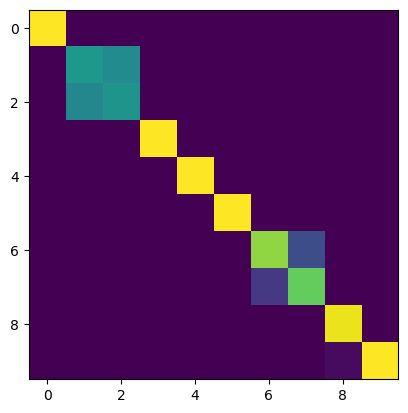

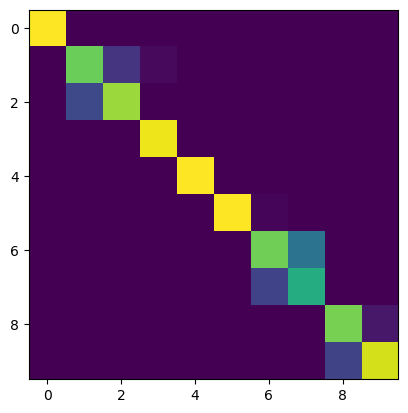

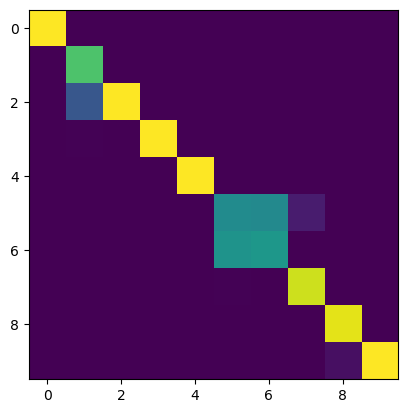

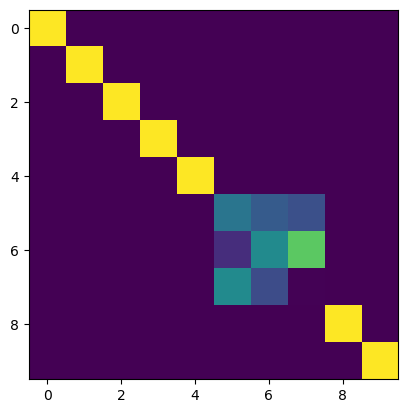

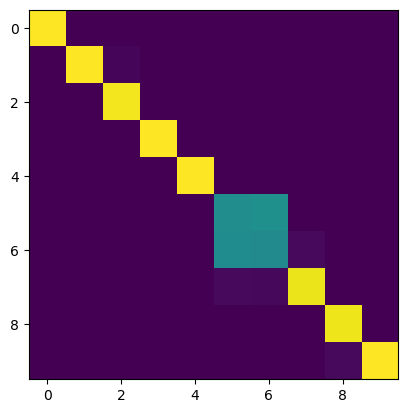

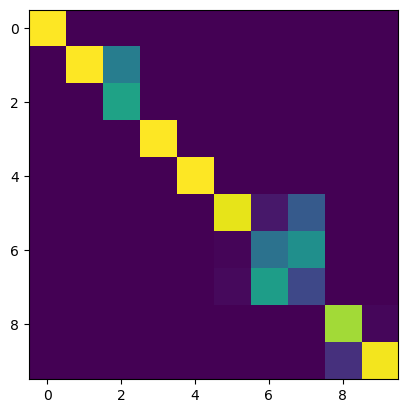

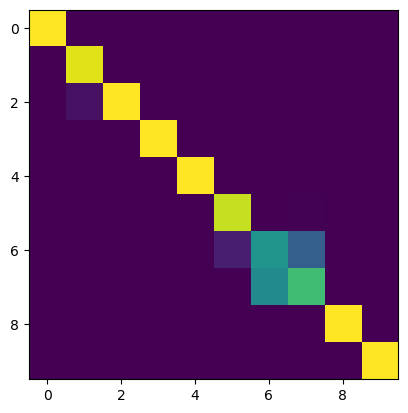

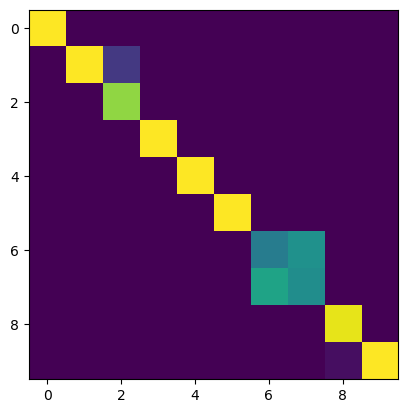

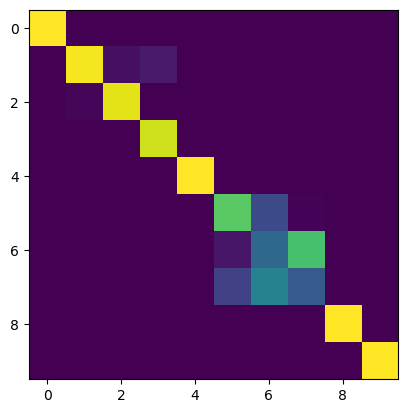

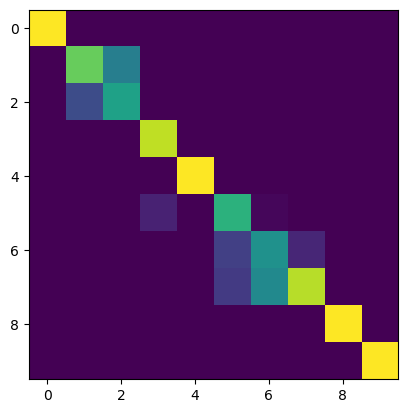

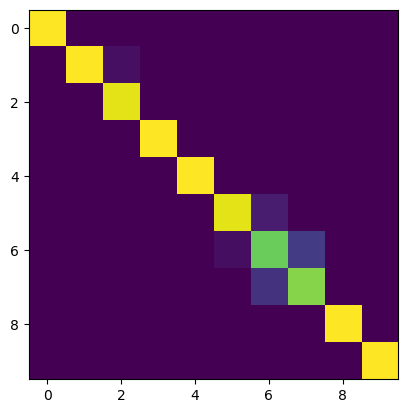

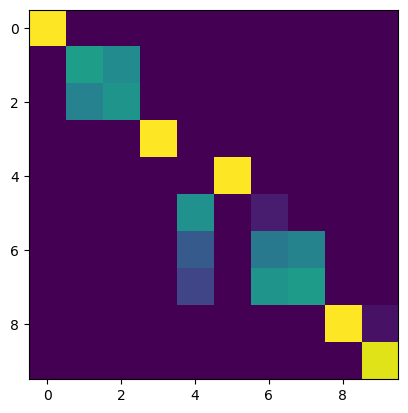

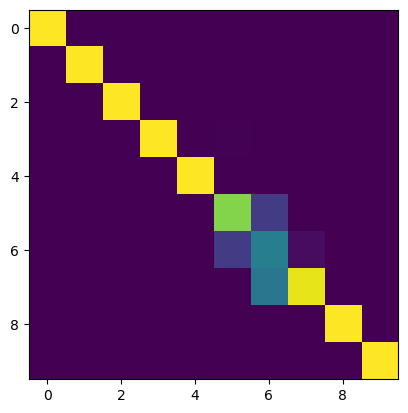

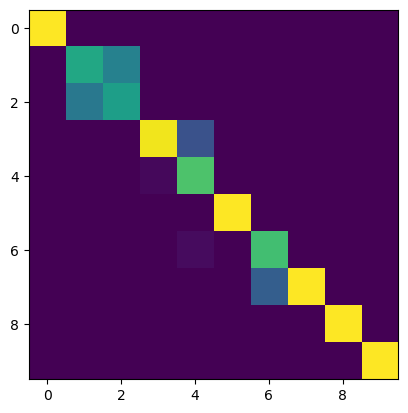

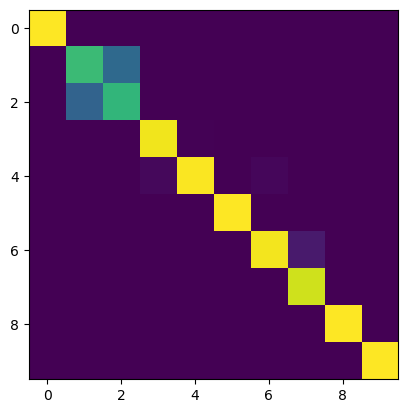

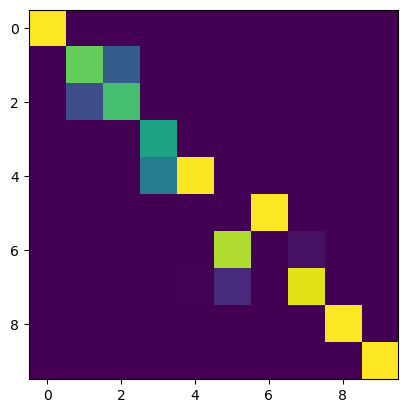

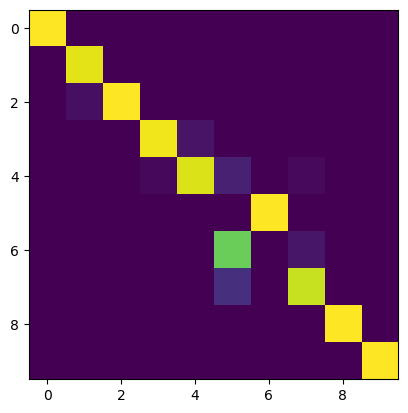

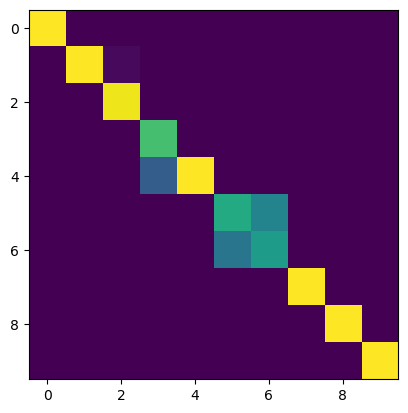

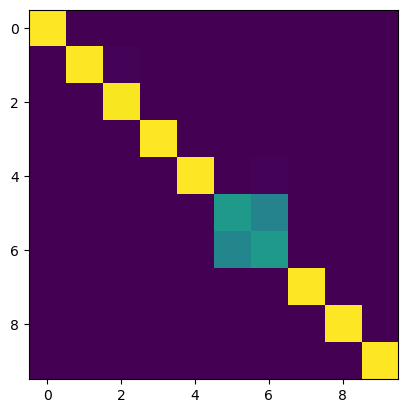

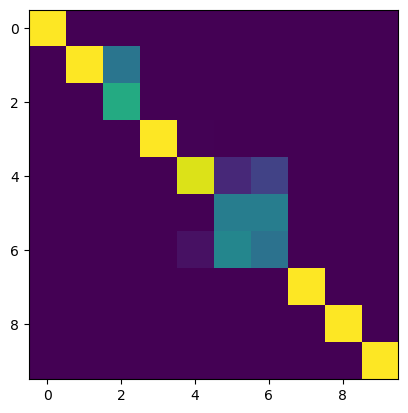

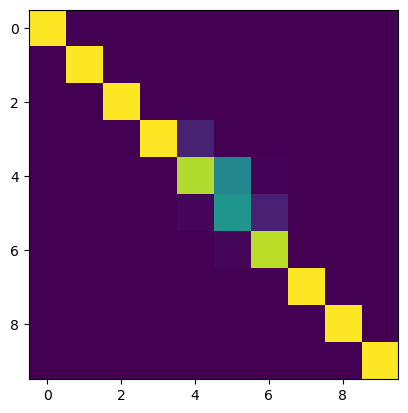

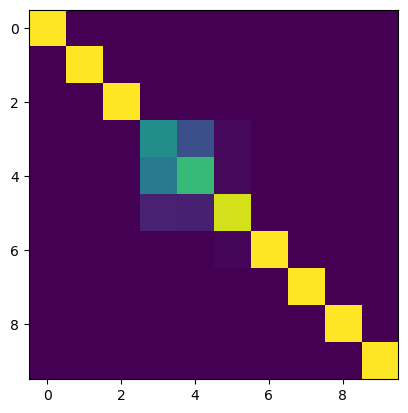

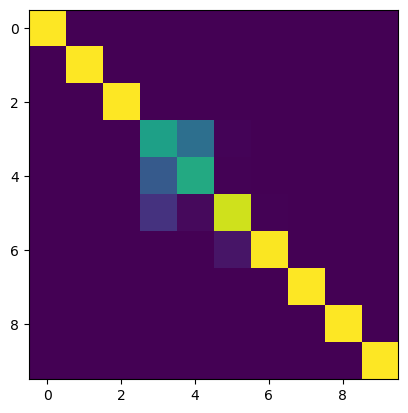

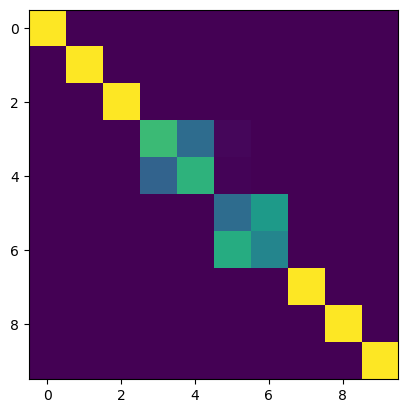

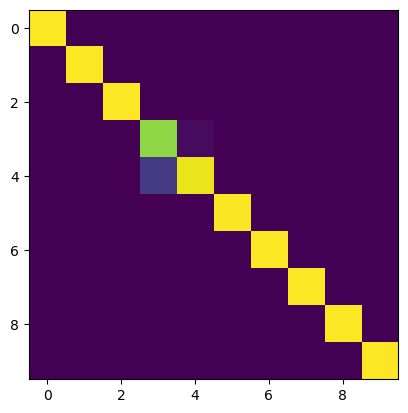

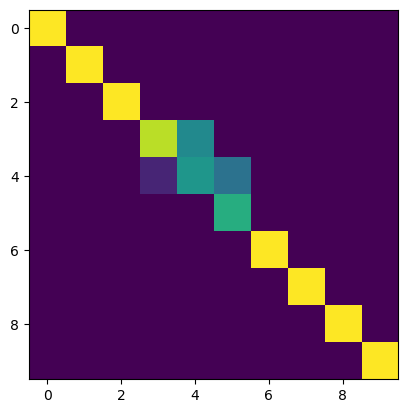

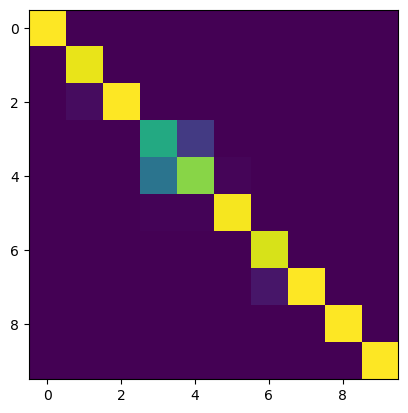

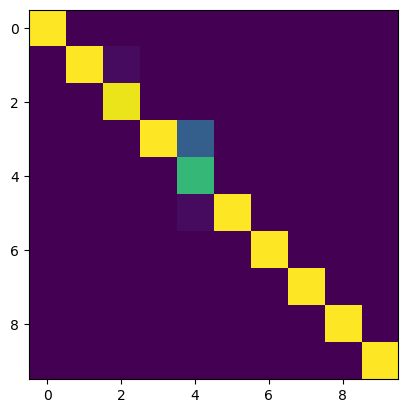

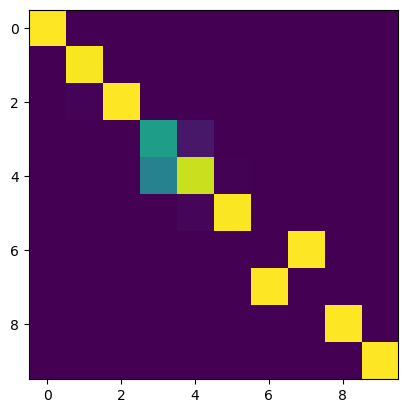

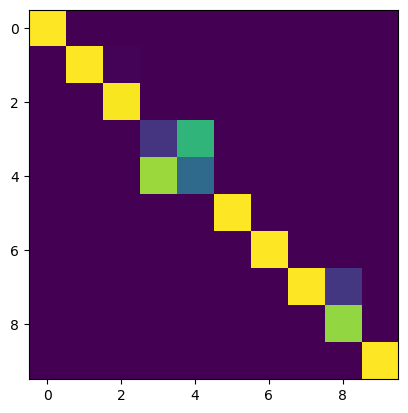

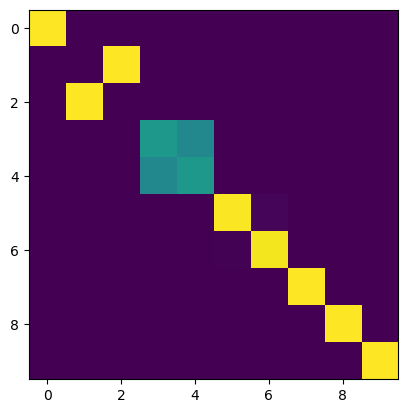

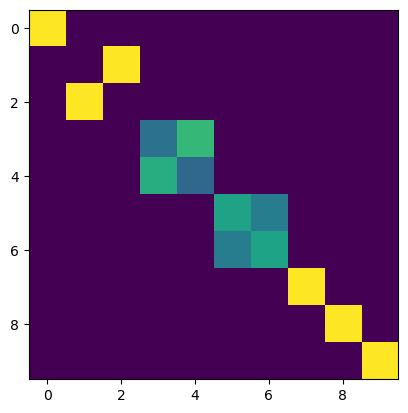

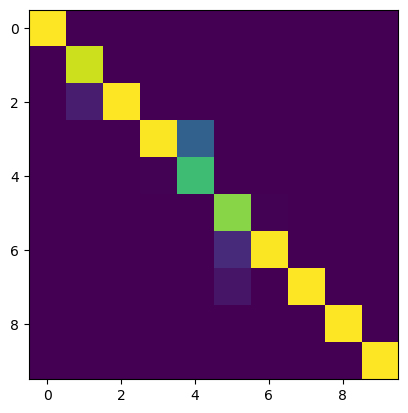

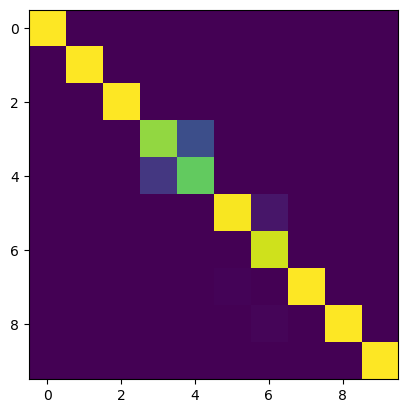

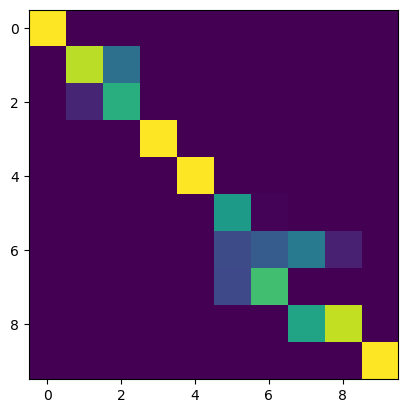

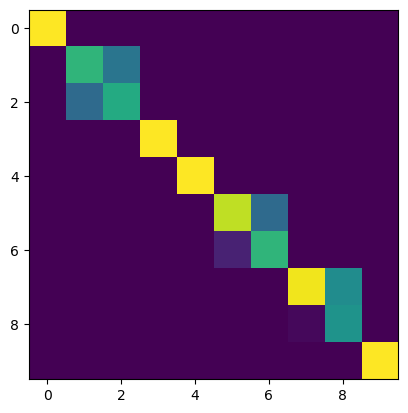

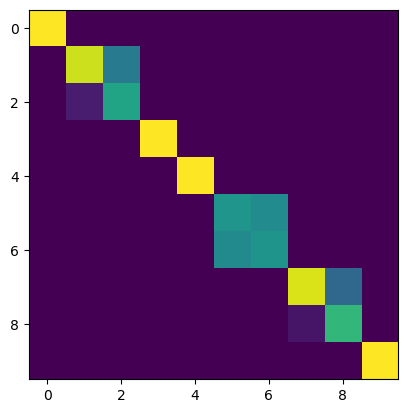

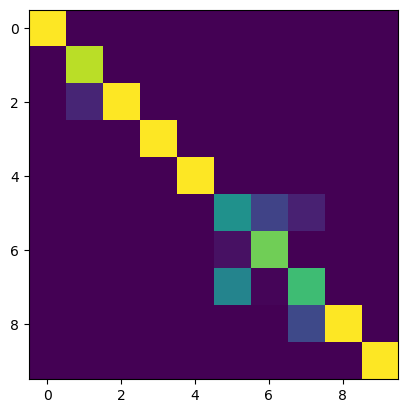

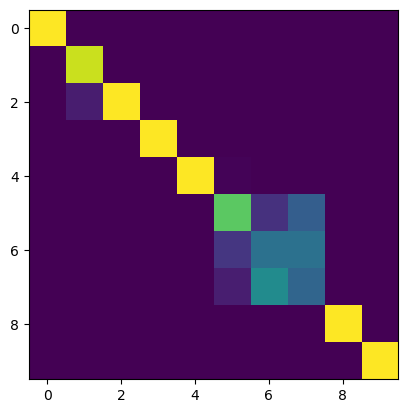

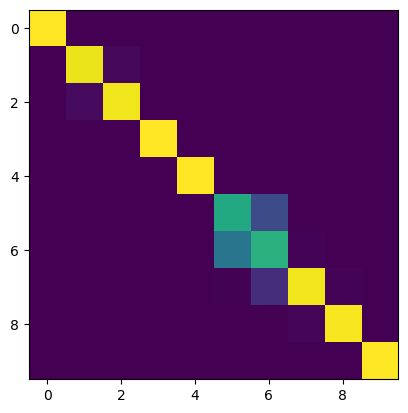

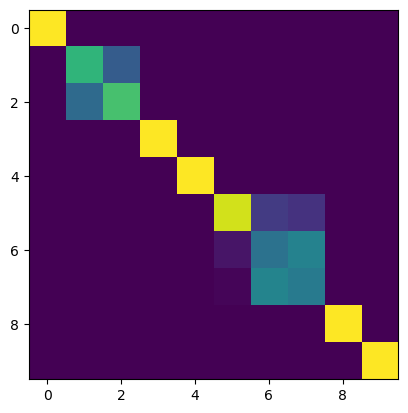

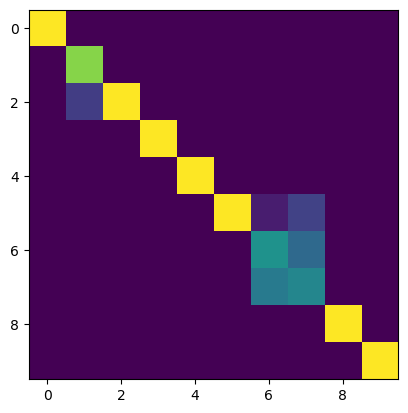

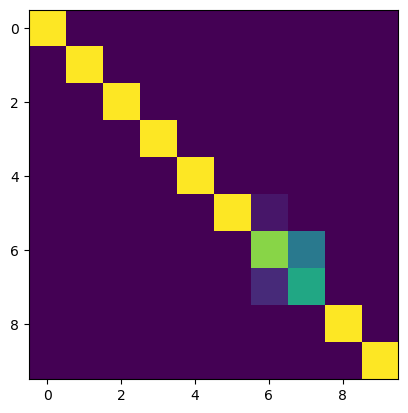

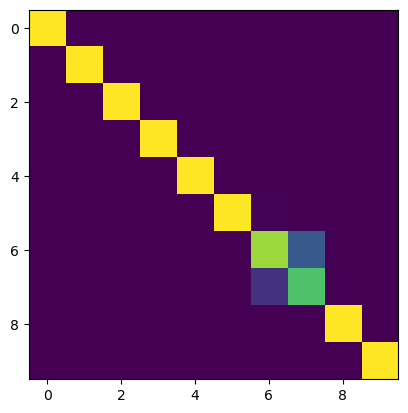

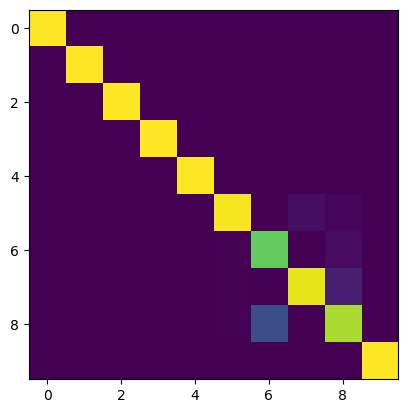

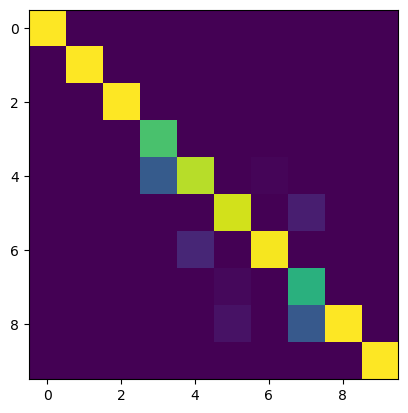

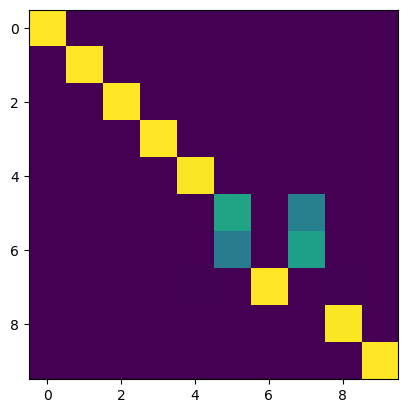

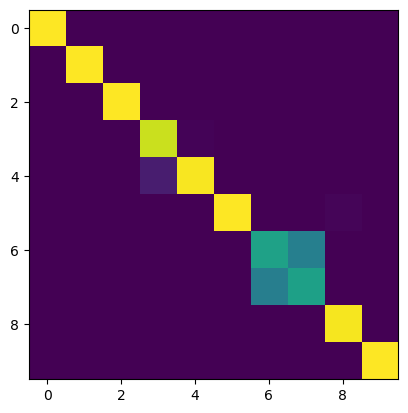

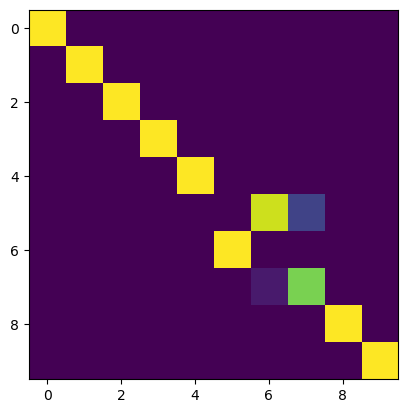

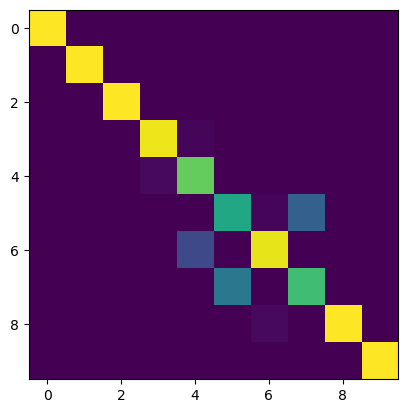

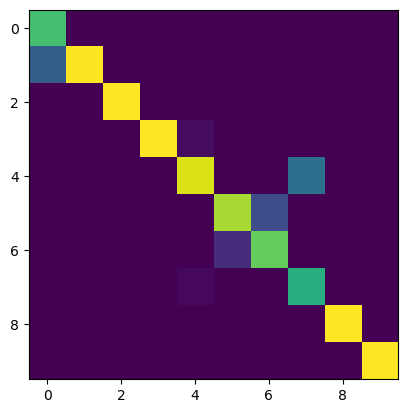

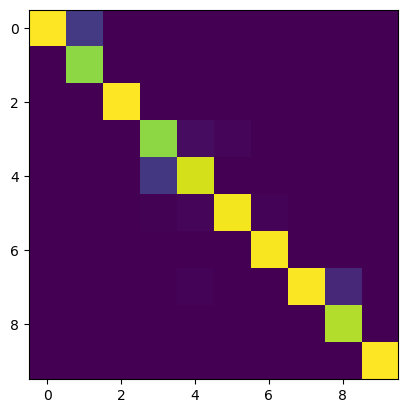

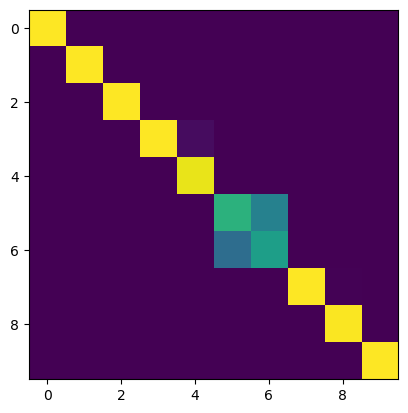

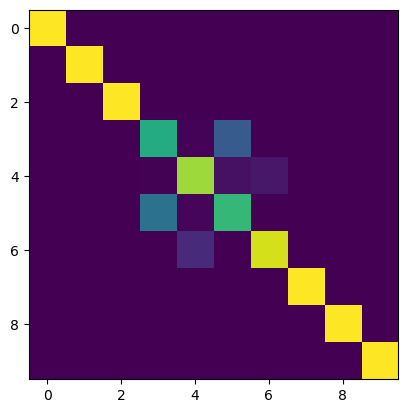

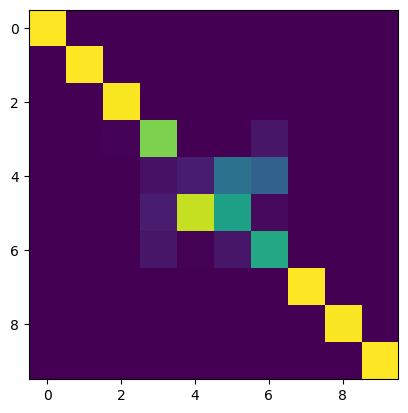

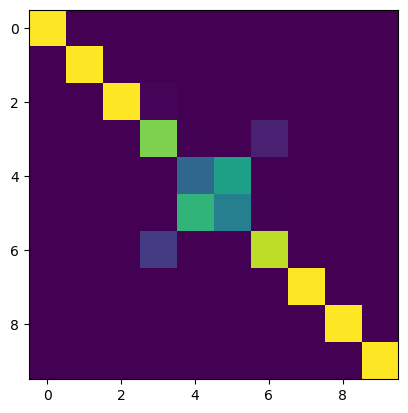

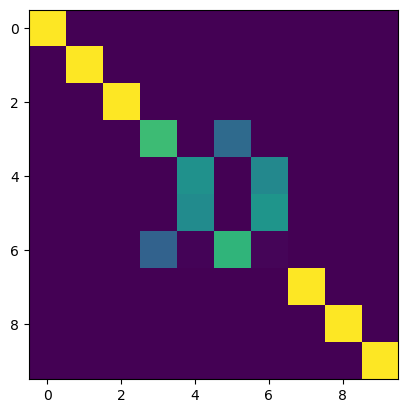

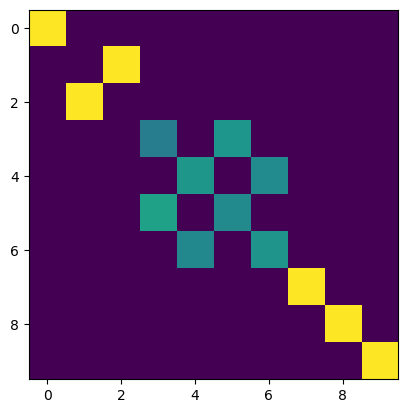

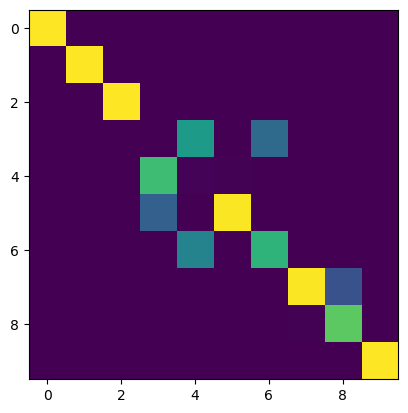

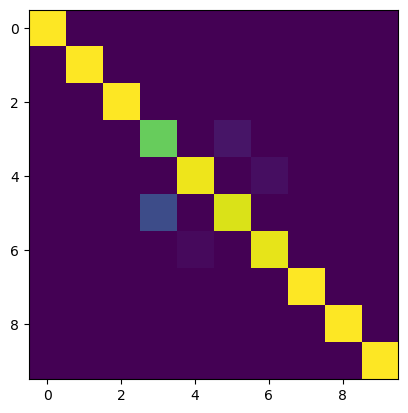

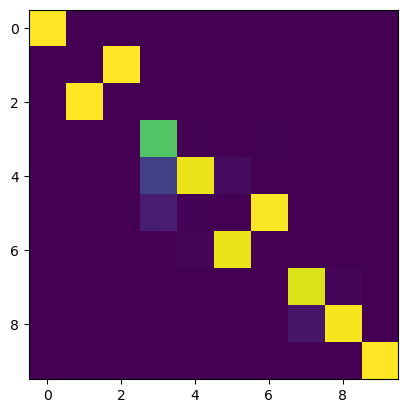

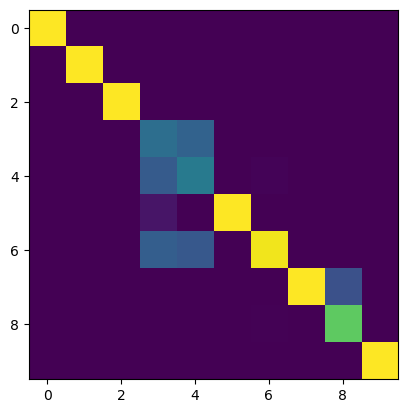

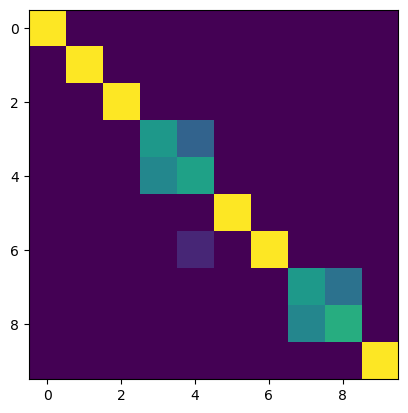

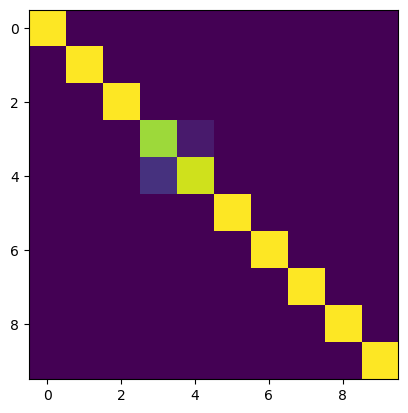

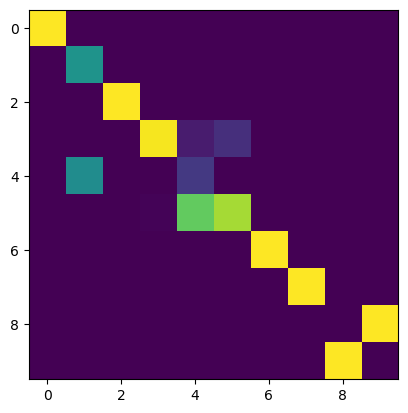

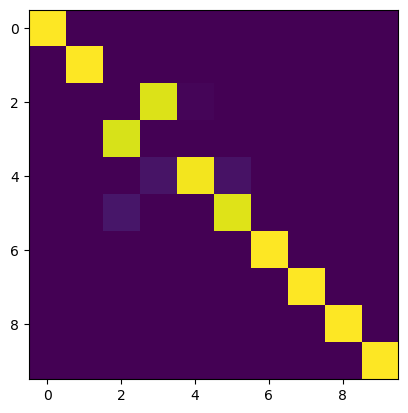

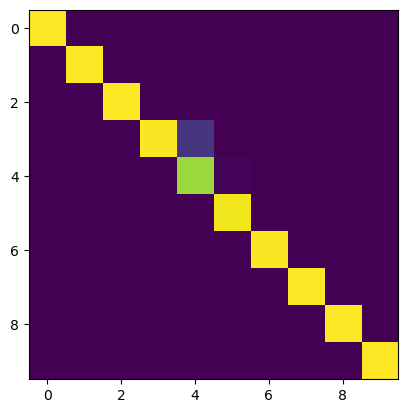

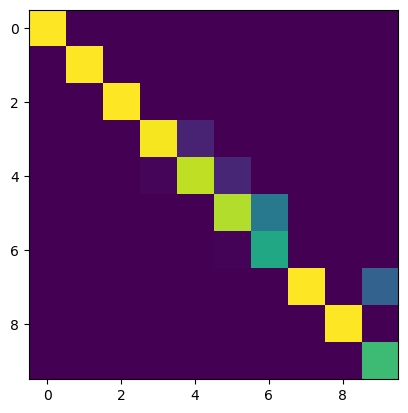

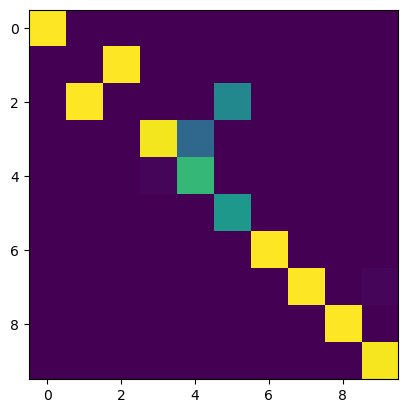

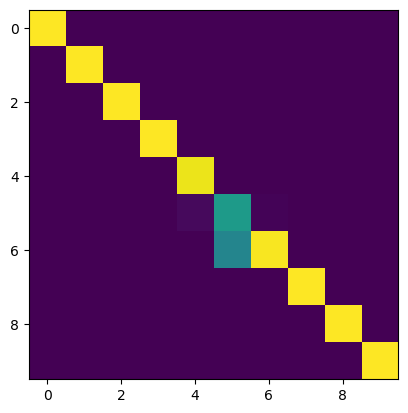

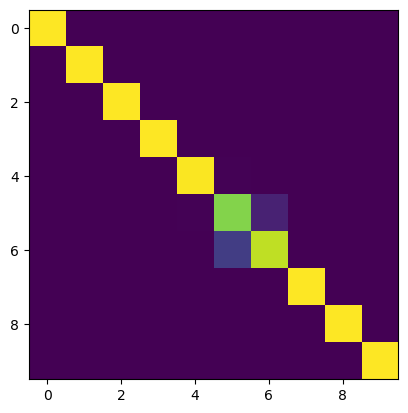

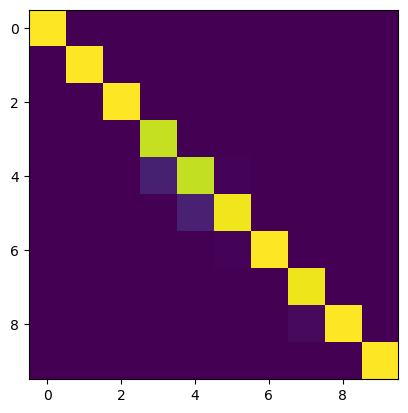

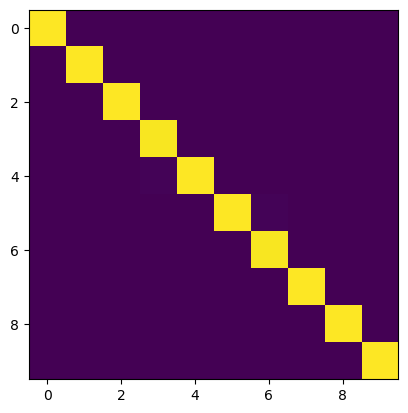

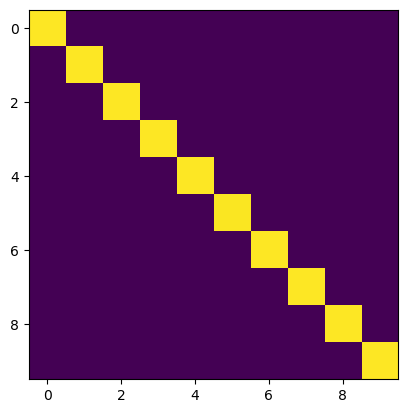

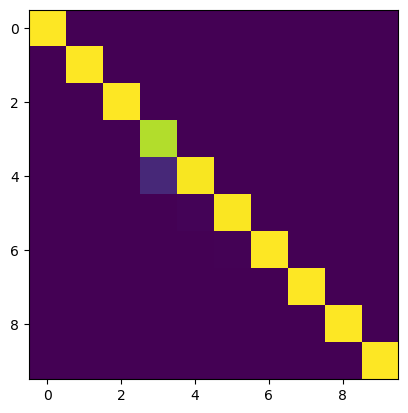

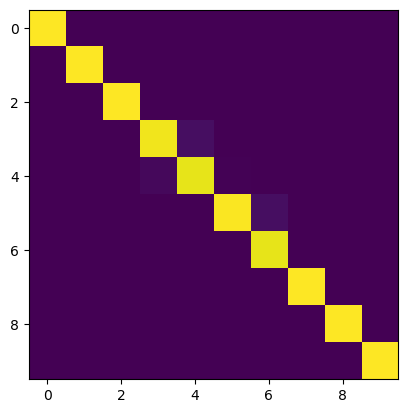

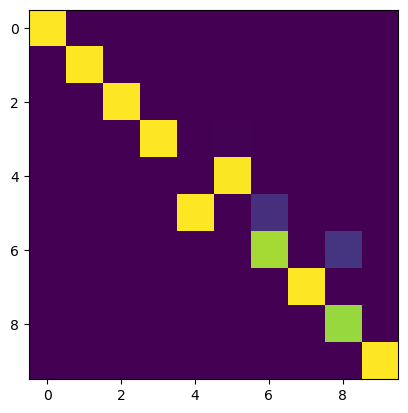

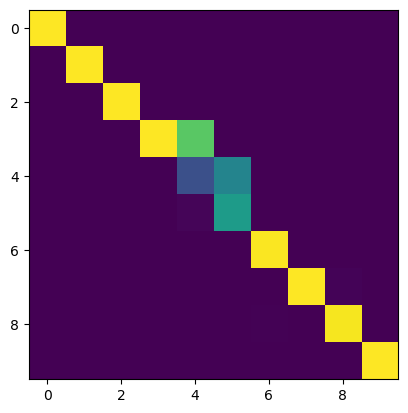

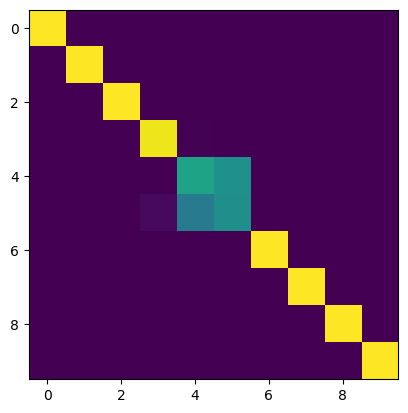

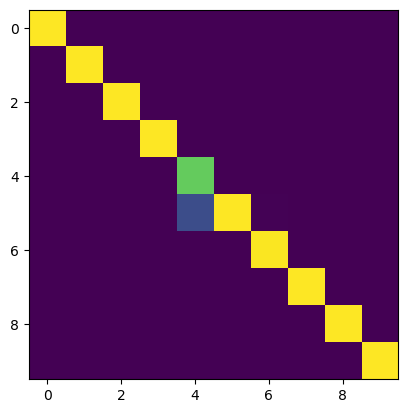

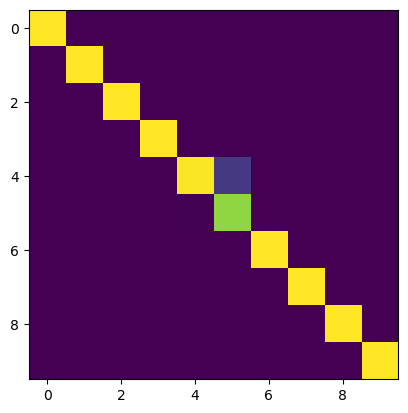

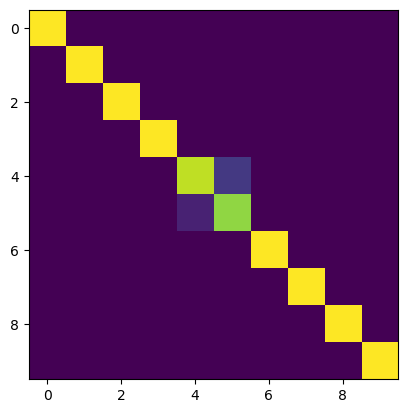

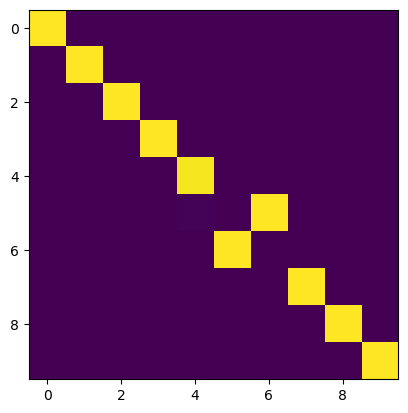

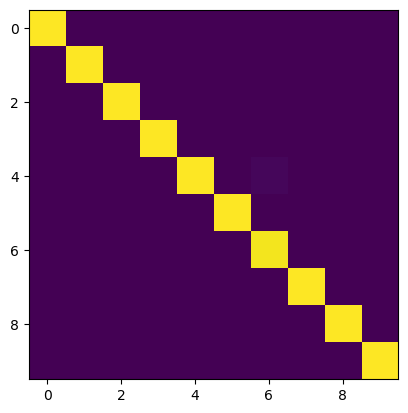

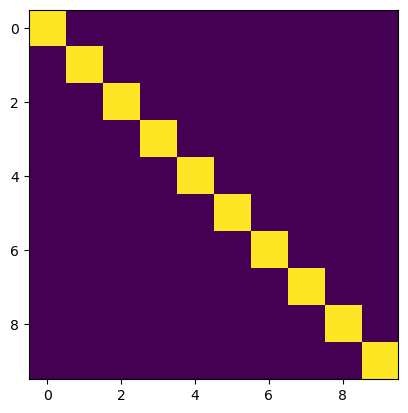

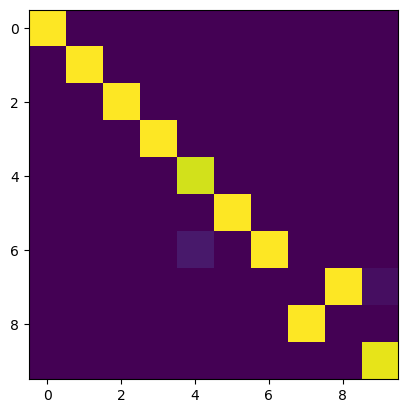

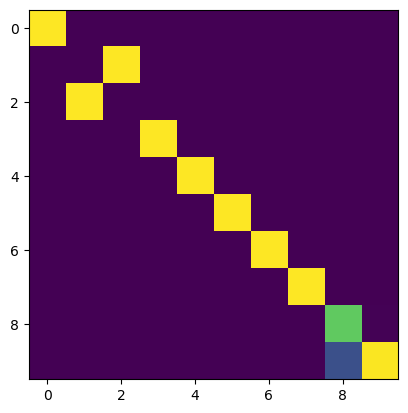

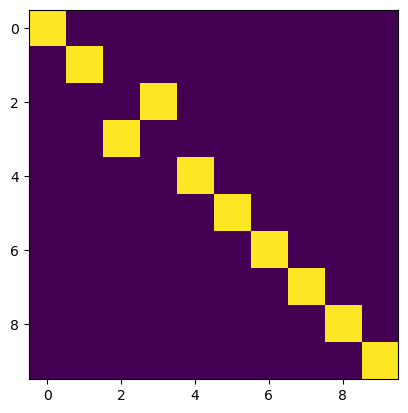

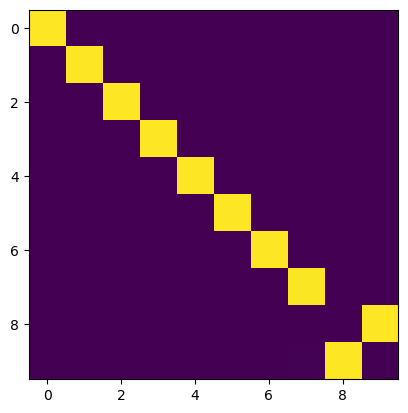

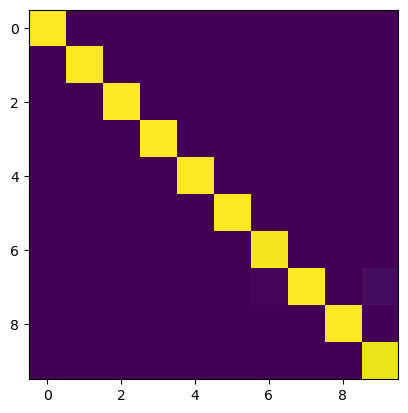

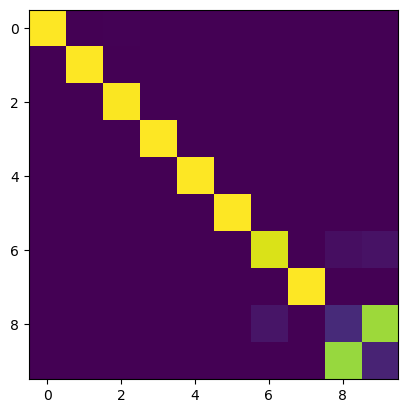

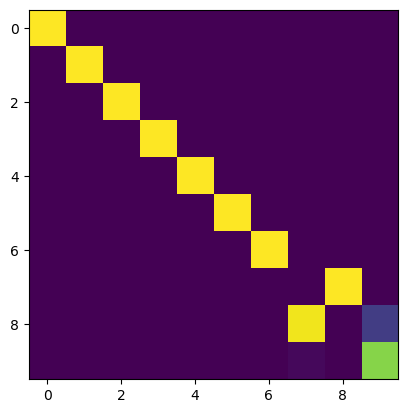

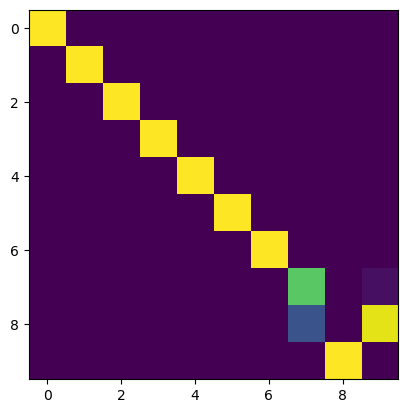

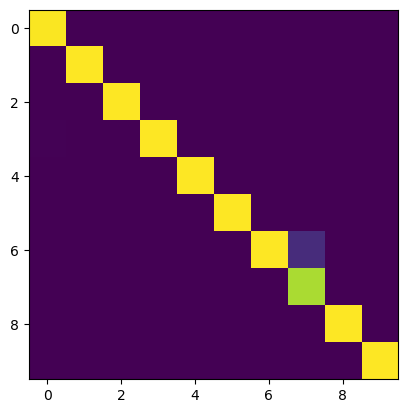

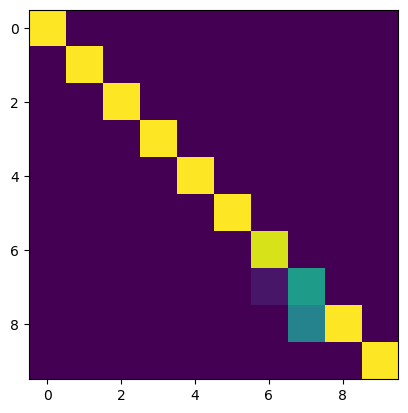

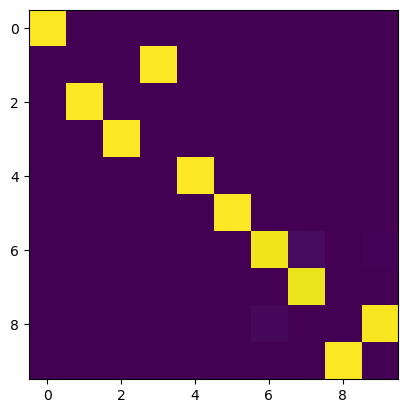

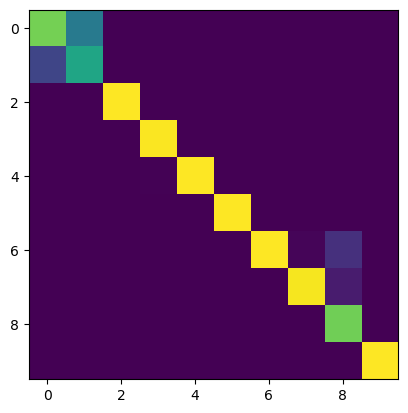

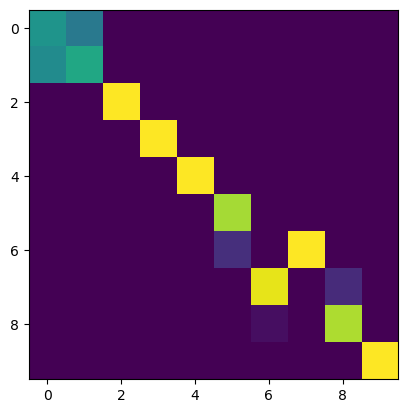

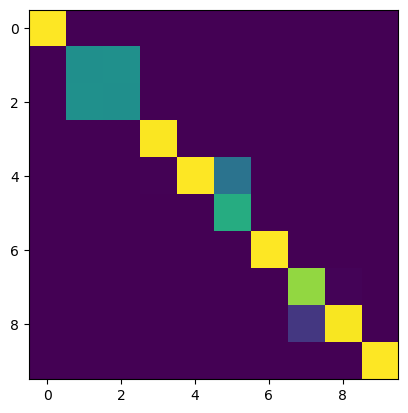

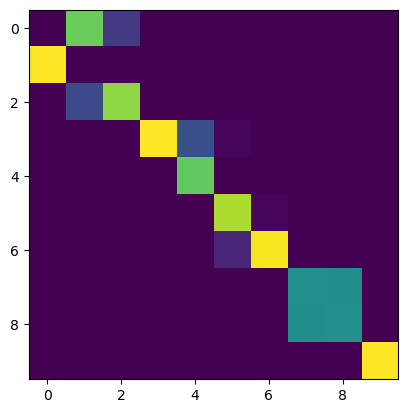

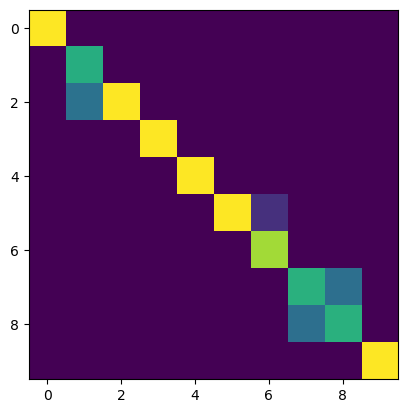

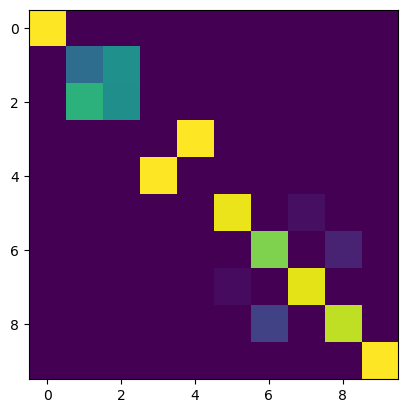

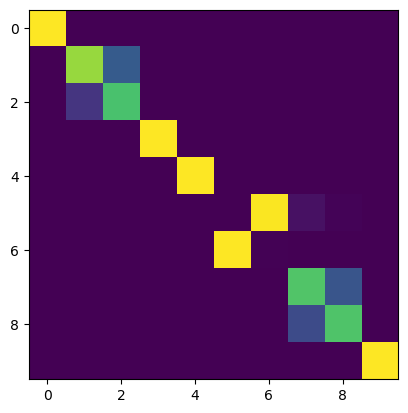

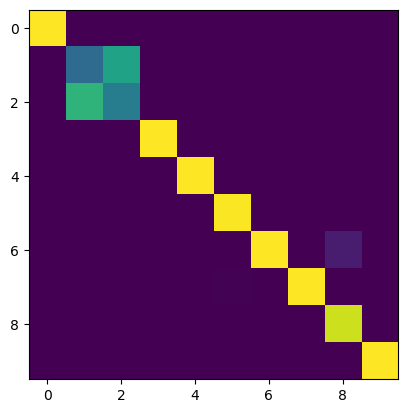

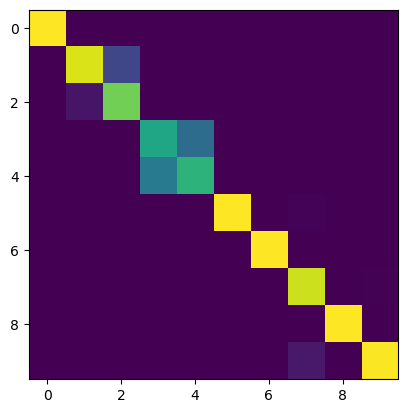

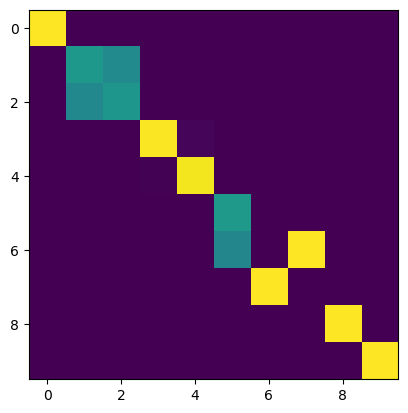

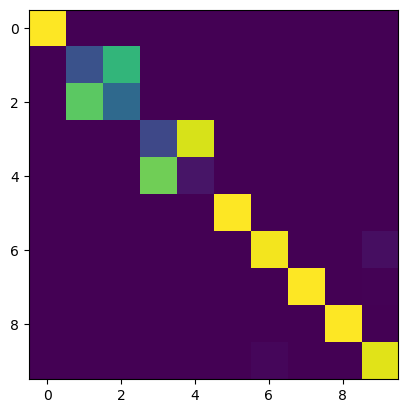

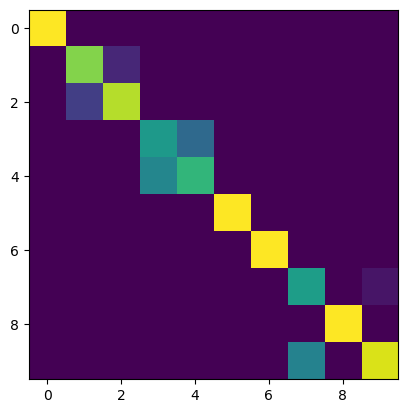

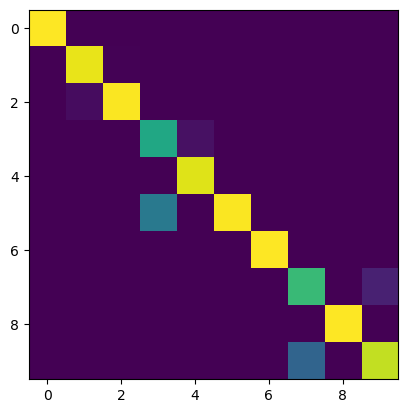

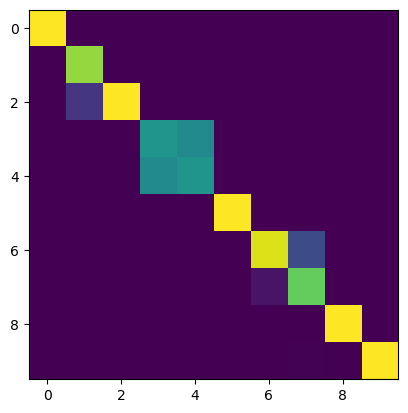

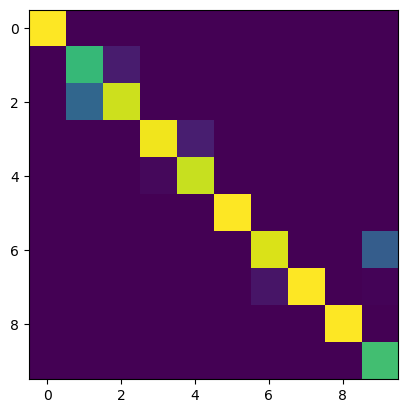

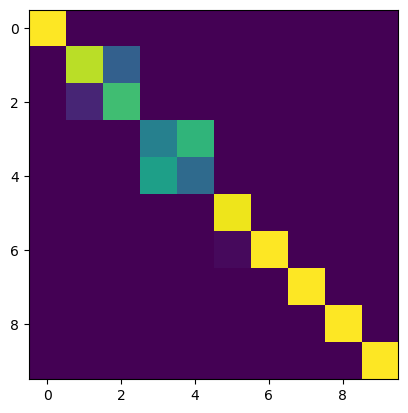

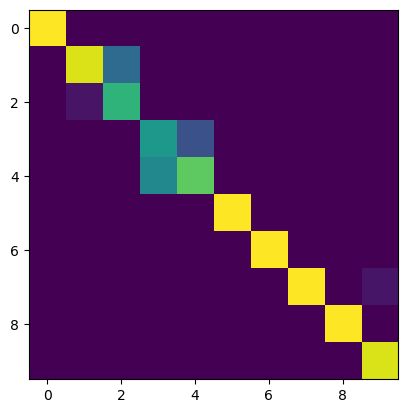

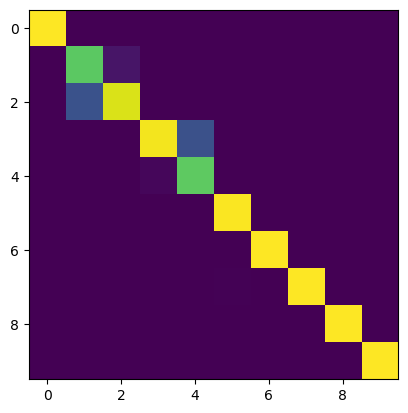

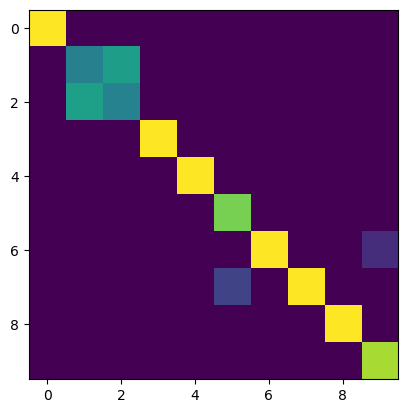

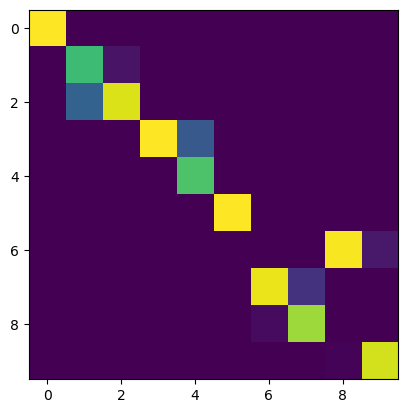

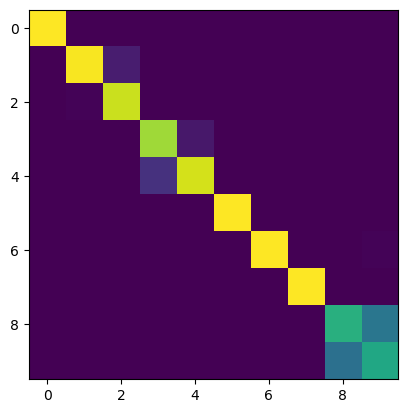

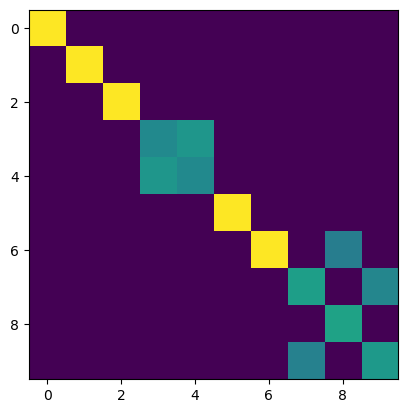

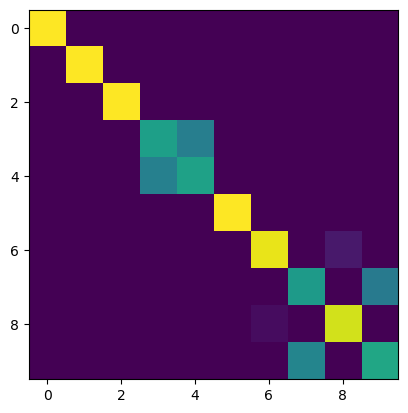

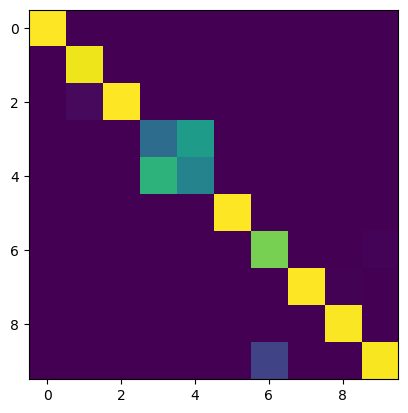

[(<matplotlib.image.AxesImage at 0x334747f70>, None),
 (<matplotlib.image.AxesImage at 0x3347ab250>, None),
 (<matplotlib.image.AxesImage at 0x33551e1d0>, None),
 (<matplotlib.image.AxesImage at 0x33557dcc0>, None),
 (<matplotlib.image.AxesImage at 0x3355f0ee0>, None),
 (<matplotlib.image.AxesImage at 0x331a58c10>, None),
 (<matplotlib.image.AxesImage at 0x331ab8520>, None),
 (<matplotlib.image.AxesImage at 0x33440e890>, None),
 (<matplotlib.image.AxesImage at 0x33448c430>, None),
 (<matplotlib.image.AxesImage at 0x3344d9630>, None),
 (<matplotlib.image.AxesImage at 0x334c50430>, None),
 (<matplotlib.image.AxesImage at 0x334ca6c50>, None),
 (<matplotlib.image.AxesImage at 0x33540c4f0>, None),
 (<matplotlib.image.AxesImage at 0x33545e7a0>, None),
 (<matplotlib.image.AxesImage at 0x3354d8580>, None),
 (<matplotlib.image.AxesImage at 0x335629750>, None),
 (<matplotlib.image.AxesImage at 0x3356943a0>, None),
 (<matplotlib.image.AxesImage at 0x3356e6a10>, None),
 (<matplotlib.image.AxesImag

In [38]:
[(plt.imshow(Pi), plt.show()) for Pi in Pi_est[::10]]

A mle error 0.298319670024769
H mle error 0.010084285852020092
A algorithm error 23.19381410354473
H algorithm error 29.695342842971133


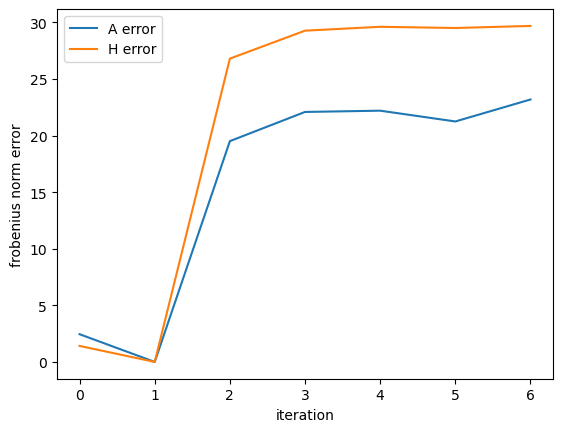

In [34]:
matrix_errors(process, As, Hs, downsample_rate=2, plot=True);

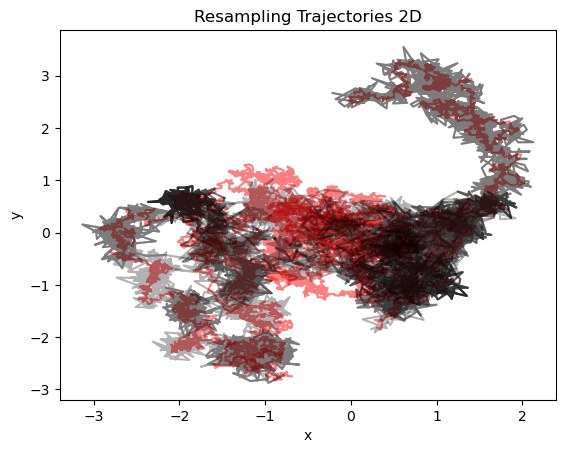

In [53]:
skip = 1
plot_sampling(xs_data[skip:], ts_data, Pi_est[skip:], process.downsample(downsample_rate), process.get_branch_times(downsample_rate), N_sample=10, plot_dim=2, reverse=True)

In [71]:
branch_times = process.get_branch_times(downsample_rate)

In [89]:
N_init*np.exp(growth_rate*process.Nt*process.dt)

44.81689070338064

In [102]:
np.sum(np.concatenate([Pi.sum(axis=1) for Pi in Pi_est]) > 1.5), Pi_est[-1].shape[1]

(32, 36)

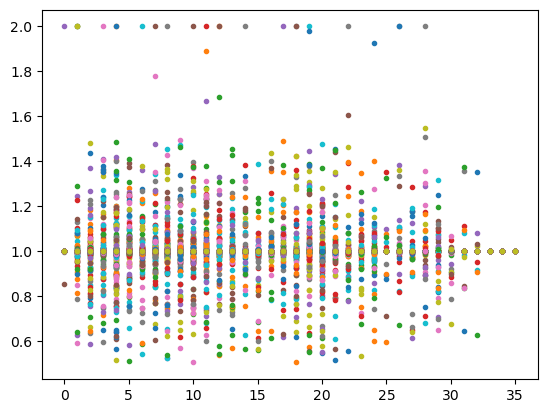

In [92]:
[plt.plot(Pi.sum(axis=1), '.') for Pi in Pi_est];

(<matplotlib.image.AxesImage at 0x337e3a080>,
 <matplotlib.colorbar.Colorbar at 0x337e0e770>)

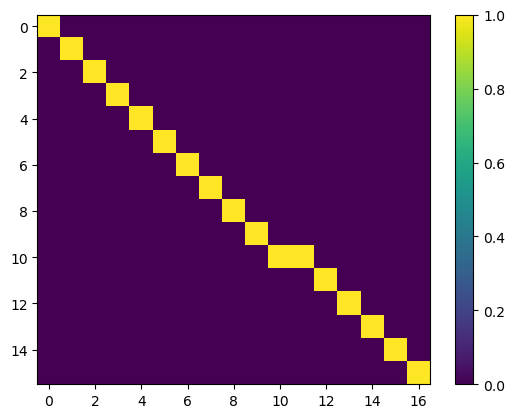

In [98]:
plt.imshow(Pi_est[branch_times[6]]), plt.colorbar()

In [9]:
np.array(xs_data)[0:2]

array([[[-1.13135794,  0.19158813],
        [-1.07143843, -0.34883215],
        [-0.26177025,  1.73850563],
        [-0.24728513,  1.17462163],
        [-0.18435259,  0.94466651],
        [-0.02455389, -1.09008146],
        [ 0.26708192, -0.33527762],
        [ 0.8837119 ,  0.85551004],
        [ 1.08590969, -1.65842677],
        [ 1.42387648, -0.9602977 ]],

       [[-1.09855529,  0.18897353],
        [-1.08712217, -0.32126269],
        [-0.28900541,  1.67648471],
        [-0.17864294,  1.25005716],
        [-0.16368368,  0.97140254],
        [-0.01227098, -1.0995021 ],
        [ 0.28096146, -0.31098881],
        [ 0.85757089,  0.82264829],
        [ 1.05879737, -1.66046281],
        [ 1.43590657, -0.94938999]]])

(<matplotlib.image.AxesImage at 0x330c71c00>,
 <matplotlib.colorbar.Colorbar at 0x330c95e40>)

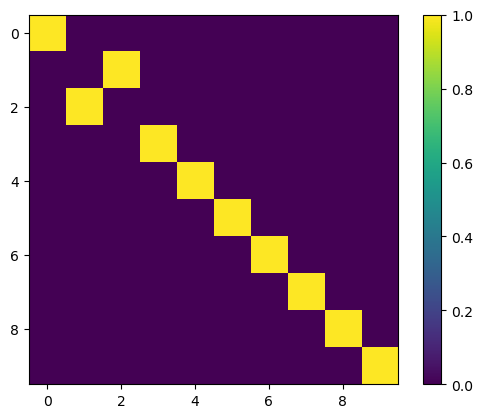

In [24]:
Pi = []
idx = 100
xs = xs_data[idx:idx+2]
ts = ts_data[idx:idx+2]
K, K_approx = time_pairwise_kernel_rectangle(xs, ts, A, H, only_approx=False)
for t_idx in range(len(ts) - 1):
    N_curr = K[t_idx].shape[0]
    N_future = K[t_idx].shape[1]

    mu = np.ones(N_curr) / N_curr
    nu = np.ones(N_future) / N_future
    
    pi = OT_sinkhorn(mu, nu, K[t_idx])
    # pi = sinkhorn_log(mu, nu, K[t_idx], maxiter=maxiters)
    Pi.append(pi)
    
coupling = Pi[0]/Pi[0].max()
plt.imshow(coupling), plt.colorbar()

In [25]:
coupling

array([[1.00000000e+000, 0.00000000e+000, 3.22370200e-208,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [1.25785380e-187, 0.00000000e+000, 1.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 2.92533873e-202,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 5.13867578e-059, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.00000000e+000, 6.81471302e-230, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 2.43407947e-049, 0.00000000e+000,
        1.73091648e-255, 1.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.0

(<matplotlib.image.AxesImage at 0x330702440>,
 <matplotlib.colorbar.Colorbar at 0x330733b80>)

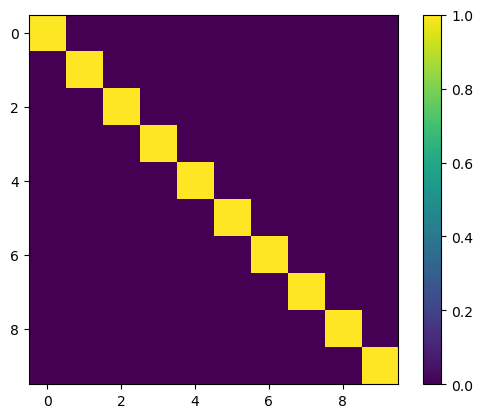